In [110]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import SVG, display
import matplotlib.patches as patches
import random as rd


In [111]:
rd.seed(45)

### 2d Datensatz, 100 Punkte

n_points = 100
n_dims = 2


x_pos_mat = np.random.rand(n_points,n_dims)

In [112]:
x_pos_mat.shape

(100, 2)

In [174]:
x_neg_mat = np.random.rand(n_points,2)


## shift
v = (2,2)
## ist shift ins positive oder negative unterschiedlich ist?
x_neg_mat+=v

In [175]:
x_pos_mat.min()

0.0038702238639718445

In [176]:
x_neg_mat.mean()

2.529869366683053

In [177]:
x_pos_mat.mean()

0.45612949808109904

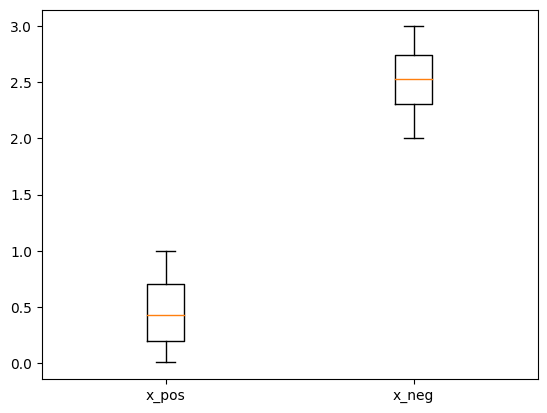

In [180]:
dic = {"x_pos":x_pos_mat.flat, "x_neg":x_neg_mat.flat}
fig, ax = plt.subplots()

ax.boxplot(dic.values())
ax.set_xticklabels(dic.keys())

plt.show()

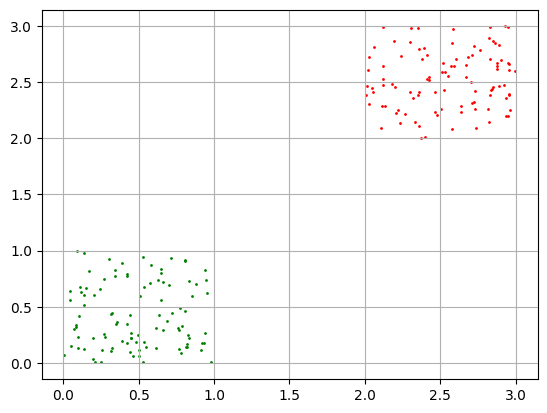

In [182]:
fig, ax = plt.subplots()

ax.scatter(x_pos_mat[:,0],x_pos_mat[:,1], c="green",s=1 )
ax.scatter(x_neg_mat[:,0],x_neg_mat[:,1], c="red",s=1)

plt.grid()
plt.show()

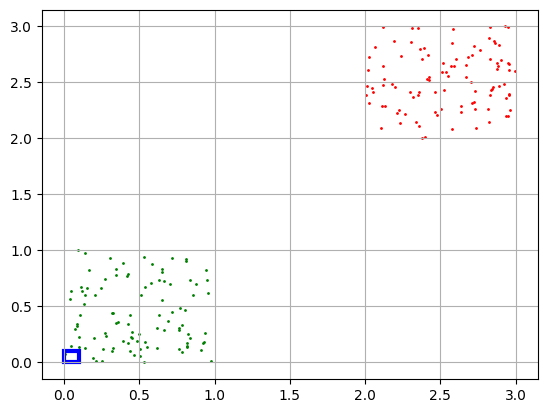

In [184]:
fig, ax = plt.subplots()

ax.scatter(x_pos_mat[:,0],x_pos_mat[:,1], c="green",s=1 )
ax.scatter(x_neg_mat[:,0],x_neg_mat[:,1], c="red",s=1)
ax.add_patch(patches.Rectangle((0,0),0.1,0.1,edgecolor="blue",linewidth=3,fill=False))
plt.grid()
plt.show()

Byes Risiko

LIT
"Das Bayes-Risiko ist ein Begriff aus der mathematischen Statistik und eine Verallgemeinerung einer Risikofunktion. Anschaulich liefert das Bayes-Risiko den potentiellen Schaden bei Verwendung eines Entscheidungsverfahrens, wenn man bereits über gewisse Vorinformationen bezüglich der Ausgangssituation verfügt. Das Bayes-Risiko wird beispielsweise zur Definition von Bayes-Entscheidungsfunktionen verwendet."


Bayes Risiko entspricht also der Fehlerrate unserer optimalen Diskriminanten. Im gegebenen Beispiel wird ein optimales Lineares Klassifizierungsmodell immer zu einer gewissen Wahrscheinlichkeit ein Fehler machen. Da wir eine Überschneidung im Bereich (x=0-0.1|y=0-0.1) von x_pos_mat (grün) u x_neg_mat (rot) haben und eine Uniforme Verteilung der Datenpunkte vorliegt in diesem Bereich, wird ein Linearer Klassifikator hier eine Fehlerrate von 50% haben, da beide Klassen gleichermaßen Verteilt in diesem Bereich vorkommen.
Da jedoch nur 10% beider Datensätze in diesem Bereich vorkommen, ist die Fehlerrate eines optimalen Linearen Klassifikator nur bei 10%. Dies liegt daran das außerhalb des genannten Bereiches keine ÜBerschneidungen existieren.

Der bestmöglichste Klassifikator würde entsprechend diese Fläche gleichmäßig Teilen, wobei die Orientierung Diagonal zu beiden KLassen sein sollte (s.u.)







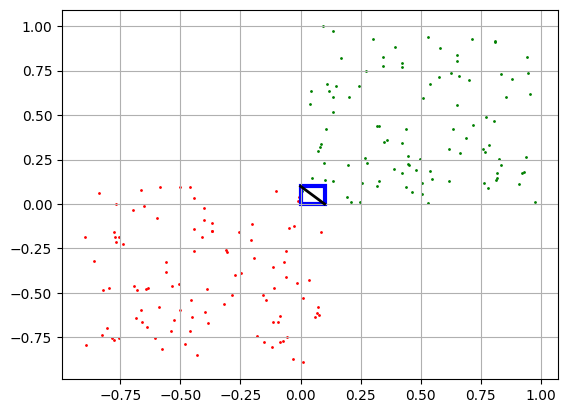

In [120]:
fig, ax = plt.subplots()





ax.scatter(x_pos_mat[:,0],x_pos_mat[:,1], c="green",s=1 )
ax.scatter(x_neg_mat[:,0],x_neg_mat[:,1], c="red",s=1)
ax.add_patch(patches.Rectangle((0,0),0.1,0.1,edgecolor="blue",linewidth=3,fill=False))
plt.plot([0,0.1],[0.1,0], color='k', linestyle='-', linewidth=2)
plt.grid()
plt.show()

In [185]:
x_neg_mat[x_neg_mat.all()>0]

array([[[2.72244478, 2.32033258],
        [2.88886873, 2.468964  ],
        [2.01366123, 2.46922409],
        [2.63752899, 2.23670029],
        [2.99760803, 2.59899931],
        [2.83126238, 2.70354482],
        [2.13252038, 2.28381461],
        [2.73099299, 2.25954044],
        [2.52737823, 2.42980014],
        [2.83880739, 2.42707464],
        [2.93522093, 2.19730508],
        [2.68252536, 2.71990471],
        [2.7253503 , 2.8233    ],
        [2.19893216, 2.46055007],
        [2.63609712, 2.28532755],
        [2.5733468 , 2.64429863],
        [2.82829463, 2.99468185],
        [2.37977271, 2.70204721],
        [2.51387238, 2.58752101],
        [2.19372626, 2.86742607],
        [2.90642944, 2.69319791],
        [2.2223807 , 2.24866159],
        [2.302503  , 2.85479743],
        [2.87818749, 2.67059243],
        [2.70356923, 2.50102586],
        [2.72975146, 2.42403187],
        [2.18111328, 2.48291505],
        [2.71144125, 2.31312262],
        [2.02557061, 2.30955664],
        [2.350

In [122]:
n_dims2 = 5
n_points2 = 100


x_pos_mat_2 = np.random.rand(n_dims2,n_points2)
x_pos_mat_neg_2 = x_pos_mat_2+(0.9)




In [186]:
from scipy.spatial import ConvexHull

dataSets = [None] * 10




for i in range(0,10):
    tmp_mat = np.random.rand(2,100)
    tmp_mat_mod = tmp_mat + 0.9
    dataSets[i] = (tmp_mat, tmp_mat_mod)


hull_one = ConvexHull(x_pos_mat)
hull_two = ConvexHull(x_neg_mat)








In [248]:
hull_one.simplices.shape

(12, 2)

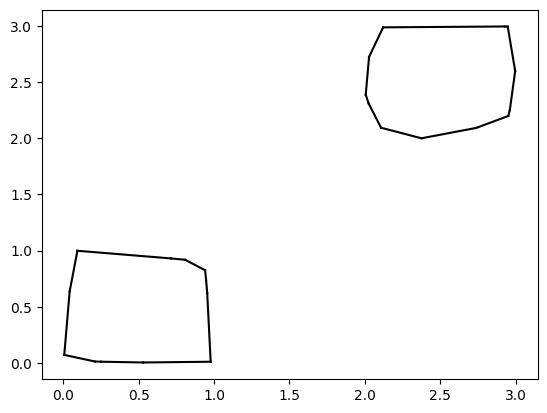

In [222]:
for simplex in hull_one.simplices:
    plt.plot(x_pos_mat[simplex, 0], x_pos_mat[simplex, 1], 'k-')

for simplex in hull_two.simplices:
    plt.plot(x_neg_mat[simplex, 0], x_neg_mat[simplex, 1], 'k-')

In [260]:
x_neg_mat[hull_two.simplices[0], 0]

array([2.10774997, 2.37550927])

In [252]:
points = np.array(hull_one.simplices.shape)

for simplex in points.size:
    points[i] =  x_neg_mat[hull_one.simplices[i], 0], x_neg_mat[hull_one.simplices[i], 1]

TypeError: 'int' object is not iterable

In [ ]:
from sympy import Point, Polygon

